In [2]:
# Data Manipulation
import numpy as np 
import pandas as pd
from   pandas import DataFrame

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl


# Statistics
import pmdarima as pm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.stattools import durbin_watson
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from scipy.special import inv_boxcox
from scipy.stats import boxcox
from scipy.interpolate import interp1d

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from dateutil.parser import parse 
import pickle

# Set the options
pd.set_option('display.max_rows', 800)
pd.set_option('display.max_columns', 500)
%matplotlib inline
plt.rcParams.update({'figure.figsize': (12, 8), 'figure.dpi': 120})

In [3]:
# Read data in form of a csv file
df = pd.read_csv('NS All Months Total Extent.csv')
df.head()

,year,mo,region,N_extent,N_area,region,S_extent,S_area,Total_extent,Total_area
0,1979,1,N,15.41,12.41,S,5.40,3.47,20.81,15.88
1,1980,1,N,14.86,11.94,S,4.56,3.08,19.42,15.02
2,1981,1,N,14.91,11.91,S,4.41,2.84,19.32,14.75
3,1982,1,N,15.18,12.19,S,5.26,3.25,20.44,15.44
4,1983,1,N,14.94,12.01,S,4.77,3.21,19.71,15.22


In [4]:
df.columns = df.columns.str.replace(' ', '')

In [5]:
df.columns

Index(['year', 'mo', 'region', 'N_extent', 'N_area', 'region', 'S_extent',
       'S_area', 'Total_extent', 'Total_area'],
      dtype='object')

In [6]:
df ['day'] = 1

In [7]:
df = df.rename(columns={'mo': 'month'})

In [8]:
df['dates'] = pd.to_datetime(df[['month', 'day','year']])

In [9]:
df.head()

,year,month,region,N_extent,N_area,region,S_extent,S_area,Total_extent,Total_area,day,dates
0,1979,1,N,15.41,12.41,S,5.40,3.47,20.81,15.88,1,1979-01-01
1,1980,1,N,14.86,11.94,S,4.56,3.08,19.42,15.02,1,1980-01-01
2,1981,1,N,14.91,11.91,S,4.41,2.84,19.32,14.75,1,1981-01-01
3,1982,1,N,15.18,12.19,S,5.26,3.25,20.44,15.44,1,1982-01-01
4,1983,1,N,14.94,12.01,S,4.77,3.21,19.71,15.22,1,1983-01-01


In [10]:
df = df[df.S_extent >=0] 

In [11]:
df = df[df.N_extent >=0] 

In [12]:
df = df[df.N_area >=0]

In [13]:
df = df.sort_values(by='dates')

In [14]:
df.head()

,year,month,region,N_extent,N_area,region,S_extent,S_area,Total_extent,Total_area,day,dates
438,1978,11,N,11.65,9.04,S,15.90,11.69,27.55,20.73,1,1978-11-01
482,1978,12,N,13.67,10.90,S,10.40,6.97,24.07,17.87,1,1978-12-01
0,1979,1,N,15.41,12.41,S,5.40,3.47,20.81,15.88,1,1979-01-01
44,1979,2,N,16.18,13.18,S,3.14,2.11,19.32,15.29,1,1979-02-01
88,1979,3,N,16.34,13.21,S,4.00,2.66,20.34,15.87,1,1979-03-01


In [15]:
df.index

Int64Index([438, 482,   0,  44,  88, 132, 176, 220, 264, 308,
            ...
            481, 525,  43,  87, 131, 175, 219, 263, 307, 351],
           dtype='int64', length=523)

In [16]:
dfN = df[['dates','month','N_extent']]

In [17]:
dfS = df[['dates','month','S_extent']]

In [18]:
dfAll = df[['dates','month','Total_extent']]

In [19]:
dfAll.head()

,dates,month,Total_extent
438,1978-11-01,11,27.55
482,1978-12-01,12,24.07
0,1979-01-01,1,20.81
44,1979-02-01,2,19.32
88,1979-03-01,3,20.34


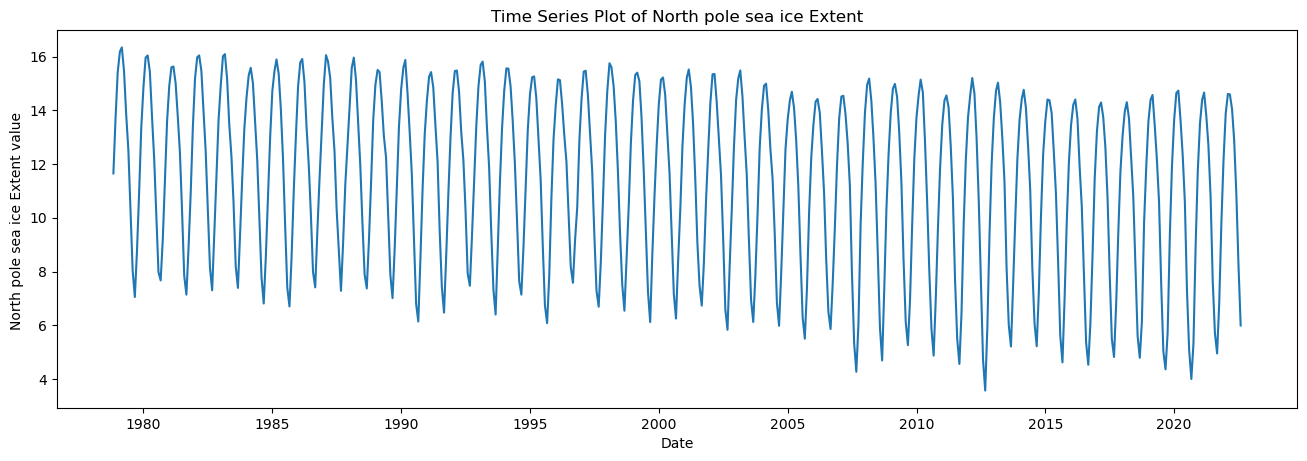

In [20]:
def plot_df(x, y, title="", xlabel='Date', ylabel='North pole sea ice Extent value ', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:blue')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(x=dfN['dates'], y=dfN['N_extent'], title='Time Series Plot of North pole sea ice Extent')

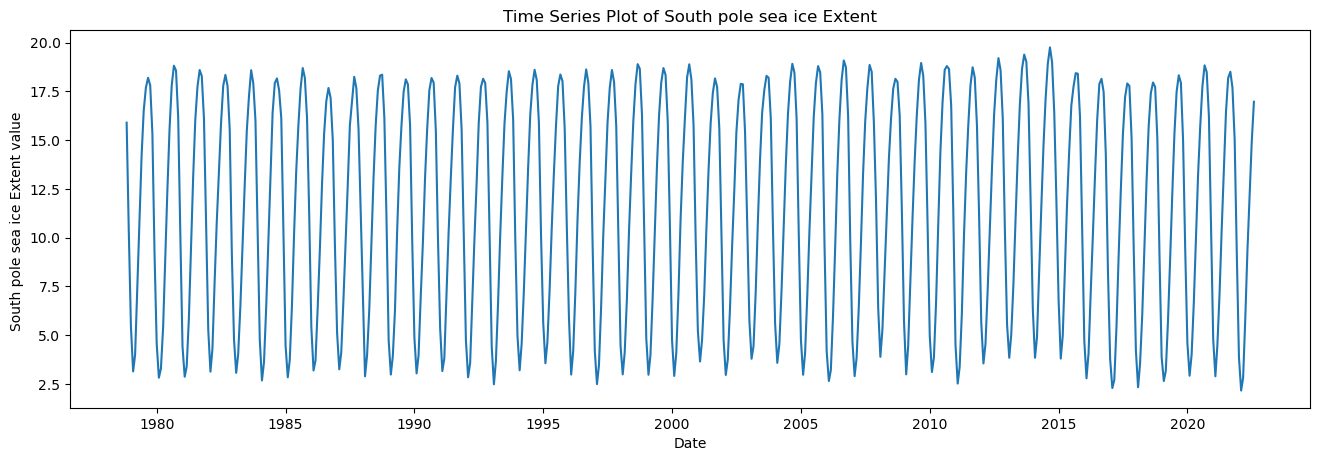

In [21]:
def plot_df(x, y, title="", xlabel='Date', ylabel='South pole sea ice Extent value ', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:blue')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(x=dfS['dates'], y=dfS['S_extent'], title='Time Series Plot of South pole sea ice Extent')

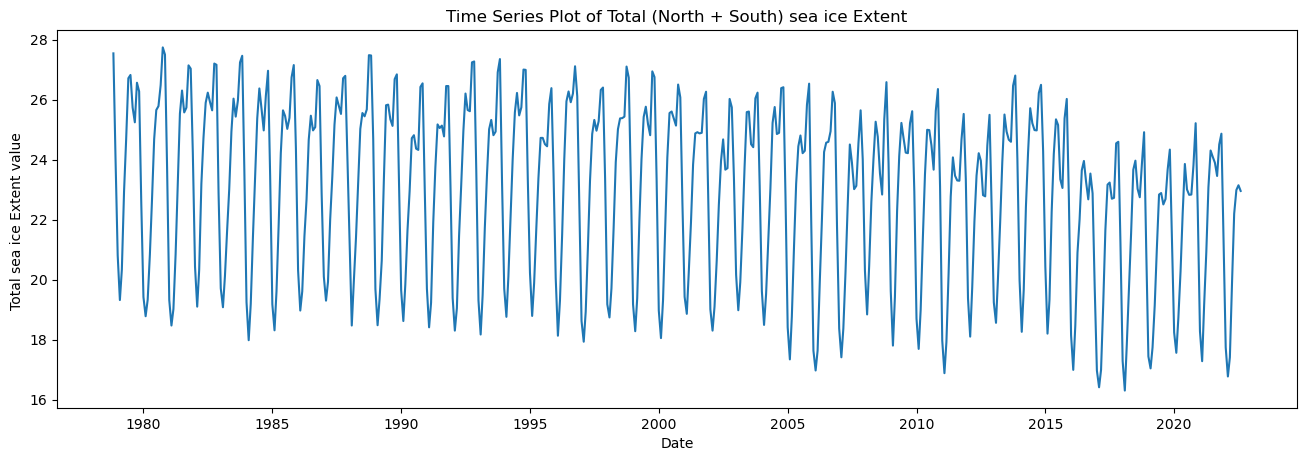

In [22]:
def plot_df(x, y, title="", xlabel='Date', ylabel='Total sea ice Extent value ', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:blue')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(x=dfAll['dates'], y=dfAll['Total_extent'], title='Time Series Plot of Total (North + South) sea ice Extent')

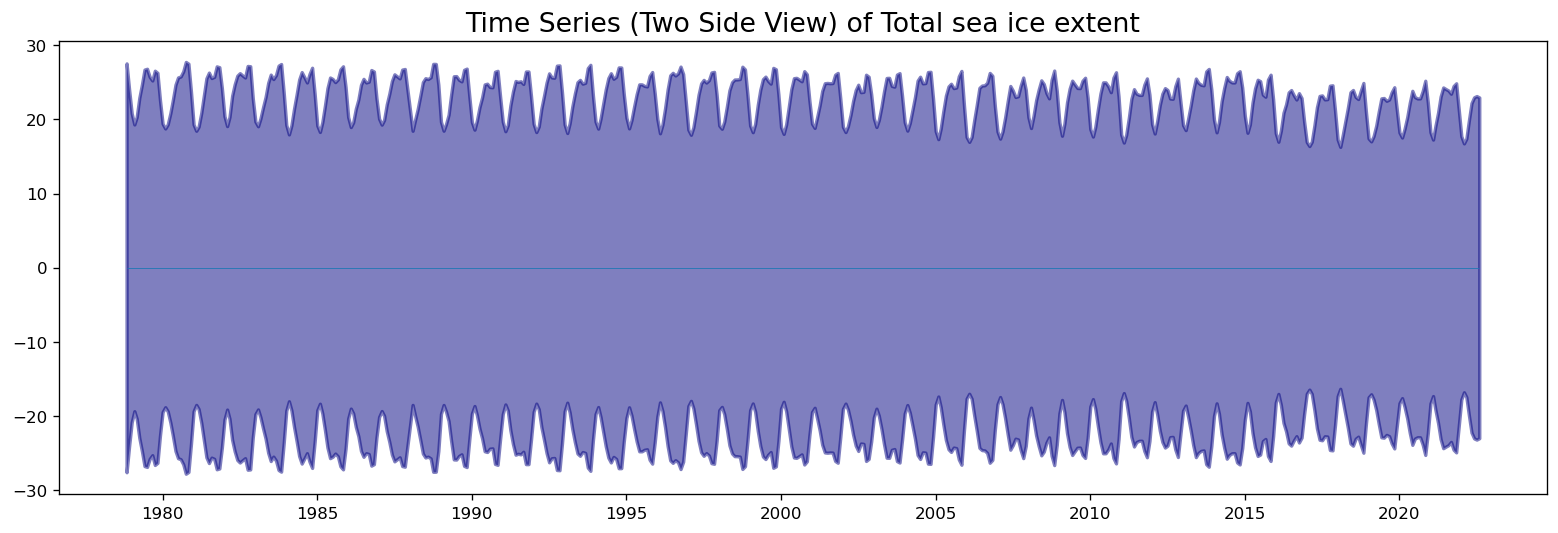

In [23]:
# Draw plot
x = dfAll['dates']
y1 = dfAll['Total_extent'].values

# Plot
fig, ax = plt.subplots(1, 1, figsize=(16,5), dpi= 120)
plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='navy')
plt.title('Time Series (Two Side View) of Total sea ice extent', fontsize=16)
plt.hlines(y=0, xmin=np.min(df.dates), xmax=np.max(df.dates), linewidth=.5)
plt.show()

In [24]:
dfN.head()

,dates,month,N_extent
438,1978-11-01,11,11.65
482,1978-12-01,12,13.67
0,1979-01-01,1,15.41
44,1979-02-01,2,16.18
88,1979-03-01,3,16.34


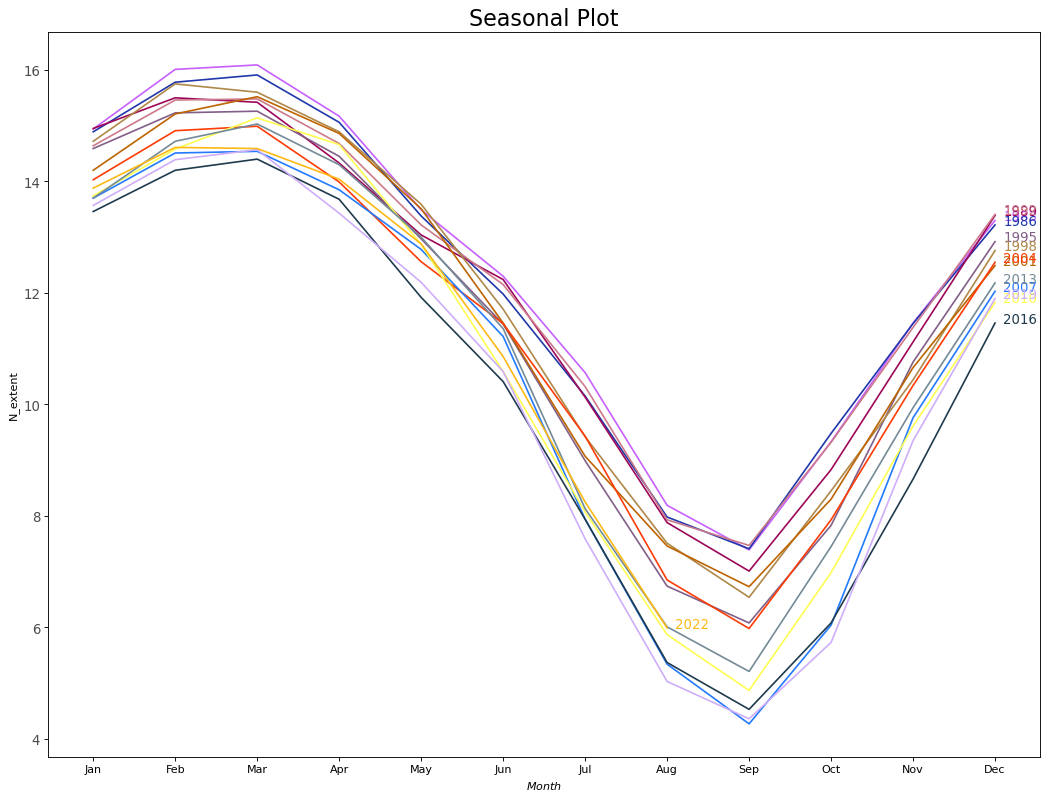

In [25]:
input_target_variable= 'N_extent'
input_date_variable= 'dates'
# Prepare data
df['year'] = [d.year for d in df[input_date_variable]]
df['month'] = [d.strftime('%b') for d in df[input_date_variable]]
years = df['year'].unique() 
years = years[np.where(years%3==0)]
# Prep Colors
np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)

# Draw Plot
plt.figure(figsize=(16,12), dpi= 80)
for i, y in enumerate(years):
    if i > 0:        
        plt.plot('month', input_target_variable, data=df.loc[df.year==y, :], color=mycolors[i], label=y)
        plt.text(df.loc[df.year==y, :].shape[0]-.9, df.loc[df.year==y, input_target_variable][-1:].values[0], y, fontsize=12, color=mycolors[i])

# Decoration
plt.gca().set(ylabel= input_target_variable, xlabel = '$Month$')
plt.yticks(fontsize=12, alpha=.7)
plt.title("Seasonal Plot", fontsize=20)
plt.show()

In [26]:
years

array([1980, 1983, 1986, 1989, 1992, 1995, 1998, 2001, 2004, 2007, 2010,
       2013, 2016, 2019, 2022], dtype=int64)

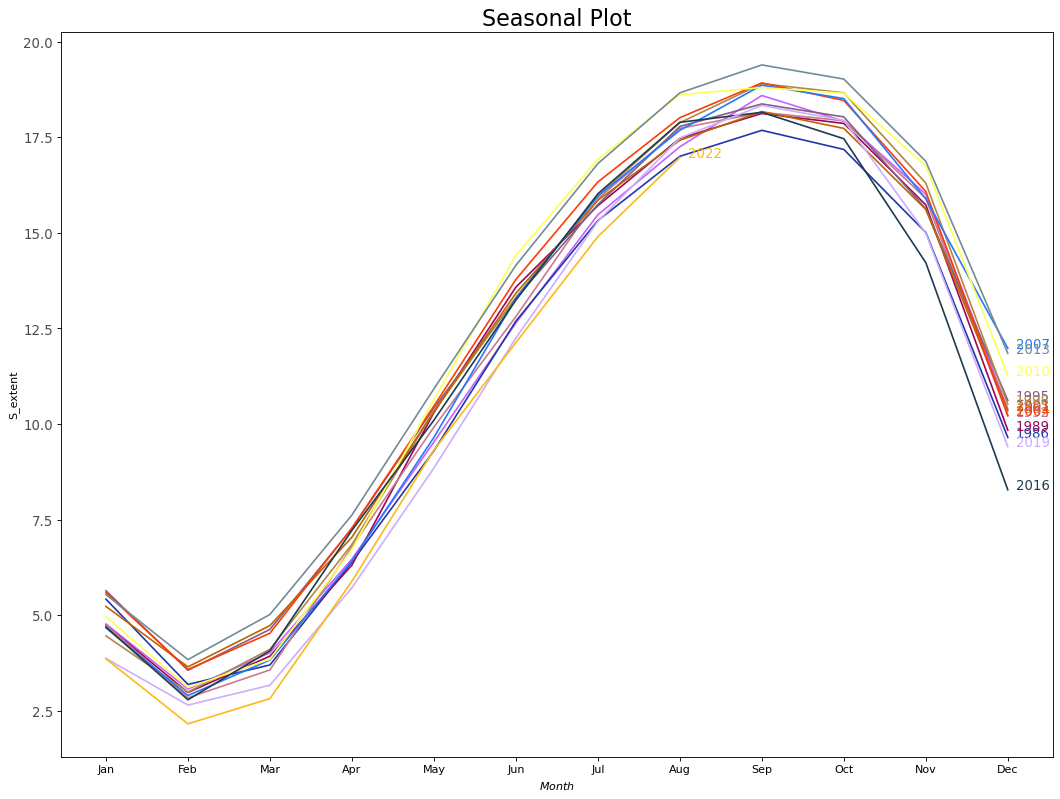

In [27]:
input_target_variable= 'S_extent'
input_date_variable= 'dates'
# Prepare data
df['year'] = [d.year for d in df[input_date_variable]]
df['month'] = [d.strftime('%b') for d in df[input_date_variable]]
years = df['year'].unique() 
years = years[np.where(years%3==0)]
# Prep Colors
np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)

# Draw Plot
plt.figure(figsize=(16,12), dpi= 80)
for i, y in enumerate(years):
    if i > 0:        
        plt.plot('month', input_target_variable, data=df.loc[df.year==y, :], color=mycolors[i], label=y)
        plt.text(df.loc[df.year==y, :].shape[0]-.9, df.loc[df.year==y, input_target_variable][-1:].values[0], y, fontsize=12, color=mycolors[i])

# Decoration
plt.gca().set(ylabel= input_target_variable, xlabel = '$Month$')
plt.yticks(fontsize=12, alpha=.7)
plt.title("Seasonal Plot", fontsize=20)
plt.show()

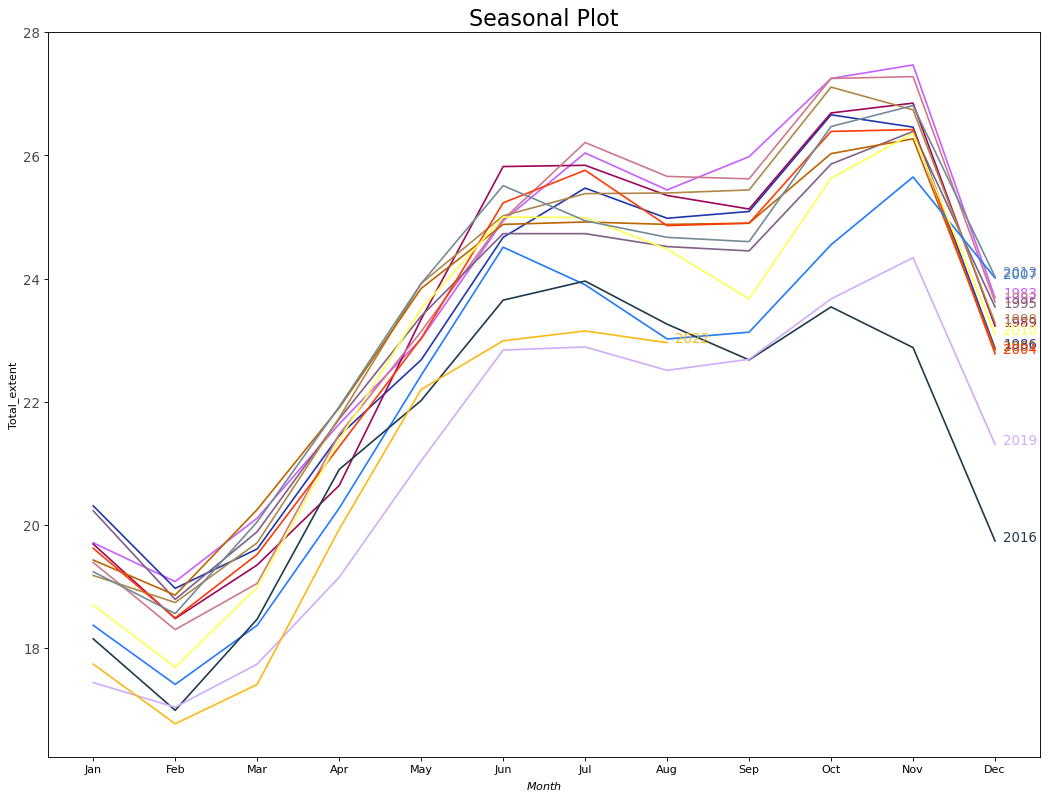

In [28]:
input_target_variable= 'Total_extent'
input_date_variable= 'dates'
# Prepare data
df['year'] = [d.year for d in df[input_date_variable]]
df['month'] = [d.strftime('%b') for d in df[input_date_variable]]
years = df['year'].unique() 
years = years[np.where(years%3==0)]
# Prep Colors
np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)

# Draw Plot
plt.figure(figsize=(16,12), dpi= 80)
for i, y in enumerate(years):
    if i > 0:        
        plt.plot('month', input_target_variable, data=df.loc[df.year==y, :], color=mycolors[i], label=y)
        plt.text(df.loc[df.year==y, :].shape[0]-.9, df.loc[df.year==y, input_target_variable][-1:].values[0], y, fontsize=12, color=mycolors[i])

# Decoration
plt.gca().set(ylabel= input_target_variable, xlabel = '$Month$')
plt.yticks(fontsize=12, alpha=.7)
plt.title("Seasonal Plot", fontsize=20)
plt.show()

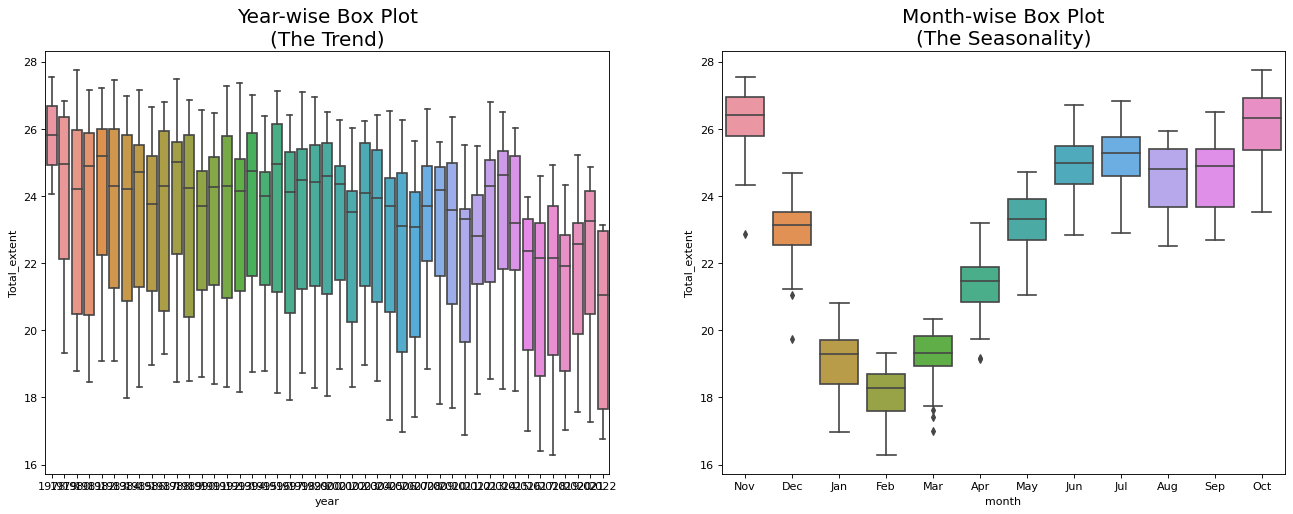

In [29]:
# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y=input_target_variable, data=df, ax=axes[0])
sns.boxplot(x='month', y=input_target_variable, data=df.loc[~df.year.isin([1991, 2008]), :])

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

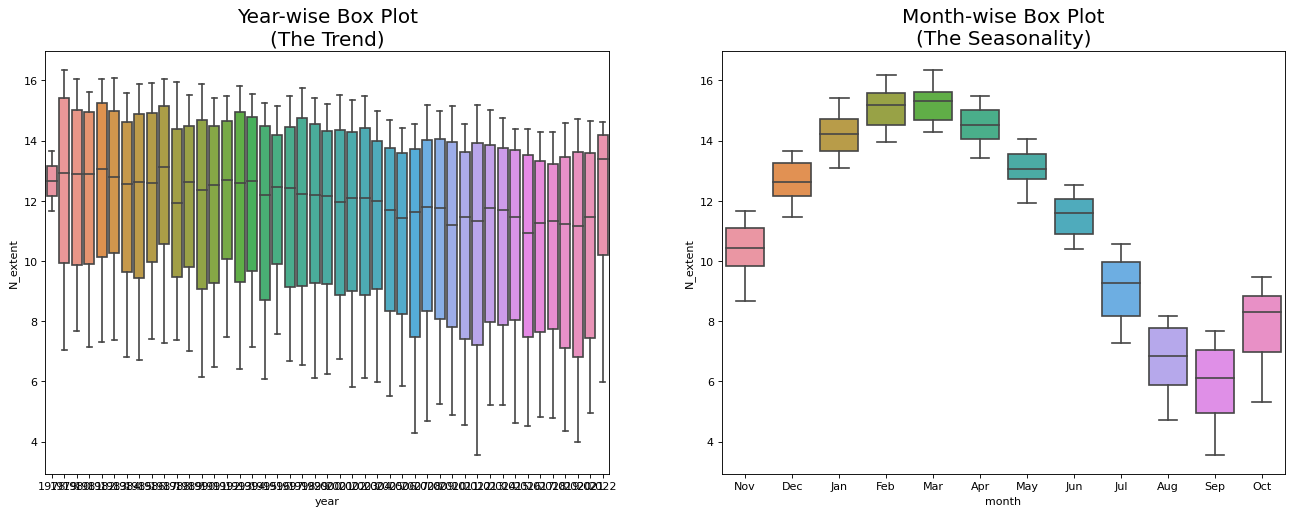

In [30]:
# Draw Plot
input_target_variable='N_extent'
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y=input_target_variable, data=df, ax=axes[0])
sns.boxplot(x='month', y=input_target_variable, data=df.loc[~df.year.isin([1991, 2008]), :])

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

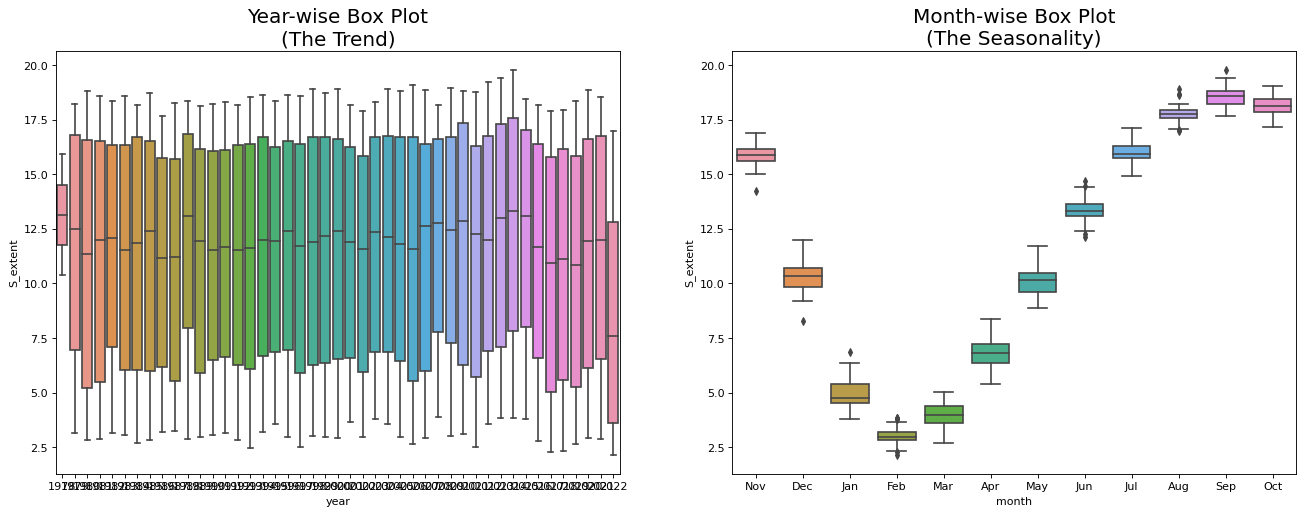

In [31]:
# Draw Plot
input_target_variable='S_extent'
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y=input_target_variable, data=df, ax=axes[0])
sns.boxplot(x='month', y=input_target_variable, data=df.loc[~df.year.isin([1991, 2008]), :])

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

In [32]:
df.index

Int64Index([438, 482,   0,  44,  88, 132, 176, 220, 264, 308,
            ...
            481, 525,  43,  87, 131, 175, 219, 263, 307, 351],
           dtype='int64', length=523)

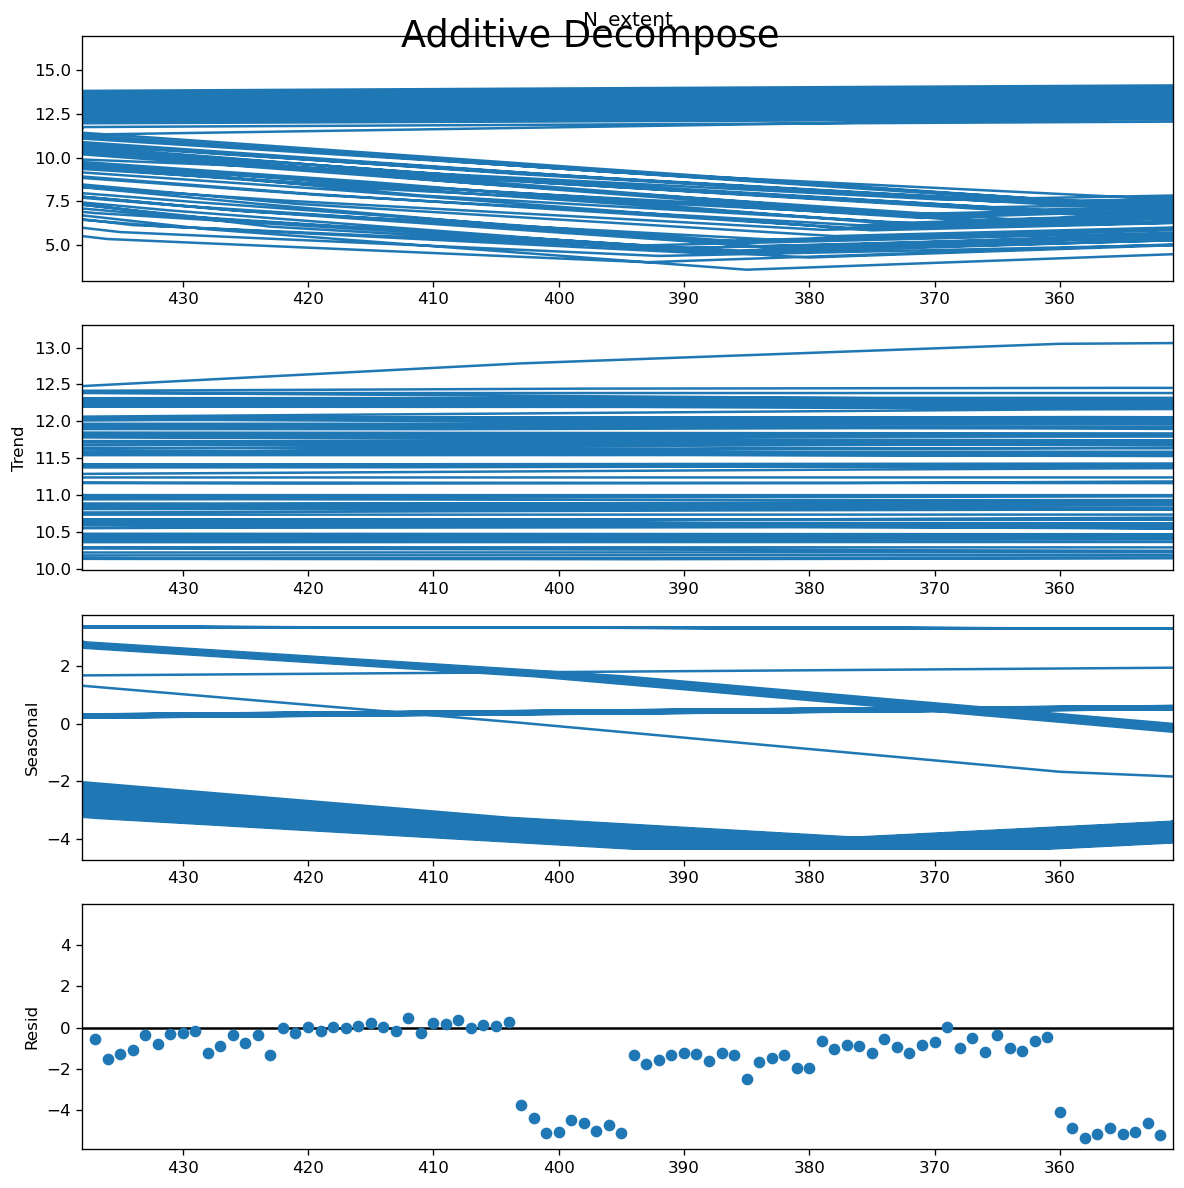

In [33]:

result_add = seasonal_decompose(df['N_extent'], model='additive', period=12)
plt.rcParams.update({'figure.figsize': (10,10)})
#result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()

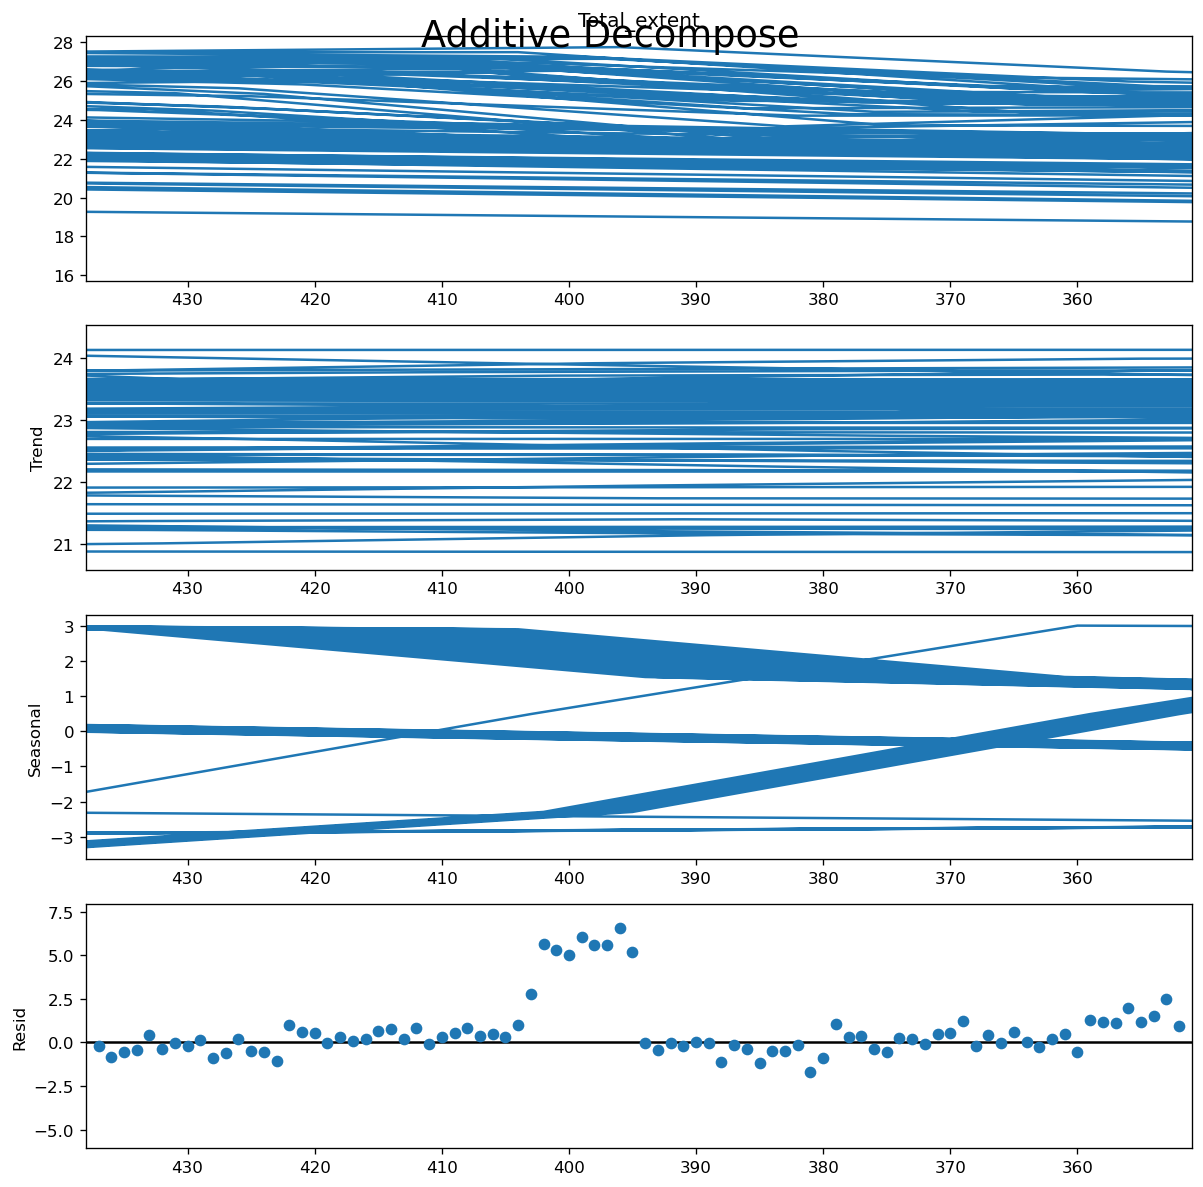

In [34]:
result_add = seasonal_decompose(df['Total_extent'], model='additive', period=12)

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
#result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()

In [35]:
df.columns

Index(['year', 'month', 'region', 'N_extent', 'N_area', 'region', 'S_extent',
       'S_area', 'Total_extent', 'Total_area', 'day', 'dates'],
      dtype='object')

In [36]:
df.year

438    1978
482    1978
0      1979
44     1979
88     1979
132    1979
176    1979
220    1979
264    1979
308    1979
352    1979
395    1979
439    1979
483    1979
1      1980
45     1980
89     1980
133    1980
177    1980
221    1980
265    1980
309    1980
353    1980
396    1980
440    1980
484    1980
2      1981
46     1981
90     1981
134    1981
178    1981
222    1981
266    1981
310    1981
354    1981
397    1981
441    1981
485    1981
3      1982
47     1982
91     1982
135    1982
179    1982
223    1982
267    1982
311    1982
355    1982
398    1982
442    1982
486    1982
4      1983
48     1983
92     1983
136    1983
180    1983
224    1983
268    1983
312    1983
356    1983
399    1983
443    1983
487    1983
5      1984
49     1984
93     1984
137    1984
181    1984
225    1984
269    1984
313    1984
357    1984
400    1984
444    1984
488    1984
6      1985
50     1985
94     1985
138    1985
182    1985
226    1985
270    1985
314    1985
358    1985
401 

In [37]:
df.index

Int64Index([438, 482,   0,  44,  88, 132, 176, 220, 264, 308,
            ...
            481, 525,  43,  87, 131, 175, 219, 263, 307, 351],
           dtype='int64', length=523)

In [38]:
import warnings
warnings.filterwarnings('ignore')

In [39]:
sarima = SARIMAX(dfS['S_extent'], 
                order=(1,1,1), 
                seasonal_order=(1,1,0,12))
predictions = sarima.fit().predict()

In [40]:
dfS.index

Int64Index([438, 482,   0,  44,  88, 132, 176, 220, 264, 308,
            ...
            481, 525,  43,  87, 131, 175, 219, 263, 307, 351],
           dtype='int64', length=523)

In [41]:
sarima = SARIMAX(df['S_extent'], 
                order=(1,1,1), 
                seasonal_order=(1,1,0,12))
predictions = sarima.fit().predict()

In [42]:
plt.figure(figsize=(24,6))
plt.plot(dfTS['S_extent'].diff(), label="Actual")
plt.plot(predictions.diff(), label="Predicted")
plt.title('S_extent testing', fontsize=20)
plt.ylabel('tesing', fontsize=16)
plt.legend()

NameError: name 'dfTS' is not defined

<Figure size 2880x720 with 0 Axes>

In [ ]:
SARIMA_model = pm.auto_arima(df['S_extent'], start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, 
                         m=12, #12 is the frequncy of the cycle
                         start_P=0, 
                         seasonal=True, #set to seasonal
                         d=None, 
                         D=1, #order of the seasonal differencing
                         trace=False,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

In [ ]:
SARIMA_model.plot_diagnostics(figsize=(15,12))
plt.show()

In [ ]:
forecast(SARIMA_model)

In [ ]:
ARIMA_model = SARIMA_model

def forecast(ARIMA_model, periods=36):
    # Forecast
    n_periods = periods
    fitted, confint = ARIMA_model.predict(n_periods=n_periods, return_conf_int=True)
    index_of_fc = pd.date_range(df.index[-1] + pd.DateOffset(months=1), periods = n_periods, freq='MS')

    # make series for plotting purpose
    fitted_series = pd.Series(fitted, index=index_of_fc)
    lower_series = pd.Series(confint[:, 0], index=index_of_fc)
    upper_series = pd.Series(confint[:, 1], index=index_of_fc)

    # Plot
    plt.figure(figsize=(15,7))
    plt.plot(df['S_extent'], color='blue')
    plt.plot(fitted_series, color='yellow')
    plt.fill_between(lower_series.index, 
                    lower_series, 
                    upper_series, 
                    color='orange', alpha=.15)

    plt.title("ARIMA/SARIMA - Forecast of Airline Passengers")
    plt.show()

forecast(ARIMA_model)

In [ ]:
#adding exogenous variable
df['month_index'] = df.month

# SARIMAX Model
SARIMAX_model = pm.auto_arima(df[['S_extent']], exogenous=df[['month_index']],
                           start_p=1, start_q=1,
                           test='adf',
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=None, D=1, 
                           trace=False,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

SARIMAX_model.summary()

In [ ]:
#dfx = df.loc[25:]
def sarimax_forecast(SARIMAX_model, periods=24):
    # Forecast
    n_periods = periods

    forecast_df = pd.DataFrame({"month_index":pd.date_range(df.index[-1], periods = n_periods, freq='MS').month},
                    index = pd.date_range(df.index[-1]+ pd.DateOffset(months=1), periods = n_periods, freq='MS'))

    fitted, confint = SARIMAX_model.predict(n_periods=n_periods, 
                                            return_conf_int=True,
                                            exogenous=forecast_df[['month_index']])
    index_of_fc = pd.date_range(df.index[-1] + pd.DateOffset(months=1), periods = n_periods, freq='MS')

    # make series for plotting purpose
    fitted_series = pd.Series(fitted, index=index_of_fc)
    lower_series = pd.Series(confint[:, 0], index=index_of_fc)
    upper_series = pd.Series(confint[:, 1], index=index_of_fc)

    # Plot
    plt.figure(figsize=(15,7))
    plt.plot(df['S_extent'], color='#1f76b4')
    plt.plot(fitted_series, color='darkgreen')
    plt.fill_between(lower_series.index, 
                    lower_series, 
                    upper_series, 
                    color='k', alpha=.15)

    plt.title("SARIMAX - Forecast of Airline Passengers")
    plt.show()

sarimax_forecast(SARIMAX_model, periods=24)

In [ ]:
df.iloc[200:]

In [ ]:
df.to_csv(r'D:\projects\seaIce\DF.csv', index = False)

In [ ]:
df.dates.head()

In [ ]:
df['dates'] = pd.to_datetime(df[['month', 'day','year']])

In [ ]:
# Read data in form of a csv file
dfNew = pd.read_csv('NS All Months Total Extent.csv')
dfNew.head()

In [ ]:
dfNew['dates'] = pd.to_datetime(df[['mo', 'day','year']])

In [ ]:
dfNew.columns = dfNew.columns.str.replace(' ', '')

In [ ]:
dfNew['dates'] = pd.to_datetime(df[['mo', 'day','year']])

In [ ]:
dfNew.columns

In [ ]:
dfNew['day']=1

In [ ]:
dfNew['dates'] = pd.to_datetime(df[['mo', 'day','year']])

In [ ]:
dfNew['dates'] = pd.to_datetime(dfNew[['mo', 'day','year']])

In [ ]:
dfNew = dfNew.rename(columns={'mo': 'month'})

In [ ]:
dfNew['dates'] = pd.to_datetime(dfNew[['month', 'day','year']])

In [ ]:
dfNew.to_csv(r'D:\projects\seaIce\DF.csv', index = False)

In [ ]:
dfReport = df[['year', 'month','N_extent','N_area', 'S_extent', 'S_area', 'dates']]

In [ ]:
df.columns

In [ ]:
df['dates'] = pd.to_datetime(df[['month', 'day','year']])

In [ ]:
from datetime import datetime

In [ ]:
df['dates'] = pd.to_datetime(df[['month', 'day','year']])

In [ ]:
df.head()

In [ ]:
dfReport = pd.read_csv('NS All Months Total Extent.csv')

In [ ]:
dfReport.head()

In [ ]:
dfReport.columns = dfReport.columns.str.replace(' ', '')

In [ ]:
dfReport['dates'] = pd.to_datetime(dfReport[['mo', 'day','year']])

In [ ]:
dfReport['day']=1

In [ ]:
dfReport['dates'] = pd.to_datetime(dfReport[['mo', 'day','year']])

In [ ]:
dfReport.columns = dfReport.columns.str.replace('mo', 'month')

In [ ]:
dfReport['dates'] = pd.to_datetime(dfReport[['month', 'day','year']])

In [ ]:
dfReport.head()

In [ ]:
dfReport = dfReport[['dates','year','month','N_extent','N_area','S_extent','S_area']]

In [ ]:
dfReport.head()

In [ ]:
dfReport.sort_values(by='dates')

In [ ]:
dfReport.index

In [ ]:
# Additive Decomposition
input_target_variable= 'S_extent'
input_seasonality=12
#dfReport.set_index('dates',inplace=True)
result_add = seasonal_decompose(dfReport[input_target_variable], model='additive', period=input_seasonality)

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
#result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()

In [ ]:
dfReport = dfReport[dfReport.S_extent >=0] 
dfReport = dfReport[dfReport.N_extent >=0] 
dfReport = dfReport[dfReport.N_area >=0] 
dfReport = dfReport[dfReport.S_area >=0]

In [ ]:
dfReport = dfReport[df.S_extent >=0]

In [ ]:
# Additive Decomposition
input_target_variable= 'S_extent'
input_seasonality=12
#dfReport.set_index('dates',inplace=True)
result_add = seasonal_decompose(dfReport[input_target_variable], model='additive', period=input_seasonality)

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
#result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()

In [ ]:
df2 = pd.read_csv('DF.csv')

In [ ]:
# Additive Decomposition
input_target_variable= 'S_extent'
input_seasonality=12
#dfReport.set_index('dates',inplace=True)
result_add = seasonal_decompose(df2[input_target_variable], model='additive', period=input_seasonality)

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
#result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()

In [ ]:
df2.set_index('dates',inplace=True)

In [ ]:
# Additive Decomposition
input_target_variable= 'S_extent'
input_seasonality=12
#dfReport.set_index('dates',inplace=True)
result_add = seasonal_decompose(df2[input_target_variable], model='additive', period=input_seasonality)

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
#result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()

In [ ]:
df2.index

In [ ]:
df.index

In [ ]:
# Additive Decomposition
input_target_variable= 'S_extent'
input_seasonality=12
#dfReport.set_index('dates',inplace=True)
result_add = seasonal_decompose(df[input_target_variable], model='additive', period=input_seasonality)

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
#result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot().suptitle('', fontsize=6)
plt.show()

In [ ]:
# Additive Decomposition
input_target_variable= 'N_extent'
input_seasonality=12
#dfReport.set_index('dates',inplace=True)
result_add = seasonal_decompose(df[input_target_variable], model='additive', period=input_seasonality)

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
#result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot().suptitle('', fontsize=6)
plt.show()

In [ ]:
# Additive Decomposition
input_target_variable= 'Total_extent'
input_seasonality=12
#dfReport.set_index('dates',inplace=True)
result_add = seasonal_decompose(df[input_target_variable], model='additive', period=input_seasonality)

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
#result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot().suptitle('', fontsize=6)
plt.show()

In [ ]:
df.head()

In [ ]:
dfReport.head()

In [ ]:
df3 = df[['dates', 'year', 'month', 'N_extent', 'N_area', 'S_extent', 'S_area', 'Total_extent', 'Total_area']]

In [ ]:
df.columns

In [ ]:
df2.head(7)

In [ ]:
dfReport['Total_extent']=dfReport['N_extent']+dfReport['S_extent']
dfReport['Total_area']=dfReport['N_area']+dfReport['S_area']

In [ ]:
dfReport.head(7)

In [ ]:
dfReport.sort_values(by='dates')

In [ ]:
dfReport.head()

In [ ]:
dfReport.columns

In [ ]:
dfTN = dfReport[['dates', 'N_extent']]

In [ ]:
dfTN.columns

In [ ]:
df.columns

In [ ]:
dfN.columns

In [47]:
dfTN = dfN[['dates','N_extent']]

In [ ]:
dfTN.index

In [ ]:
dfTN.set_index('dates',replace=True)

In [ ]:
dfTN.set_index('dates',inplace=True)

In [ ]:
import pymannkendall as mk
import matplotlib.pyplot as plt
import statsmodels.api as sm

print(mk.original_test(dfTN, alpha=0.05))

In [43]:
dfTS = dfS[['dates','S_extent']]

In [ ]:
dfTS.set_index('dates',inplace=True)

In [ ]:
import pymannkendall as mk
import matplotlib.pyplot as plt
import statsmodels.api as sm

print(mk.original_test(dfTS, alpha=0.05))

In [ ]:
dfTS.describe()

In [44]:
dfTS.columns

Index(['dates', 'S_extent'], dtype='object')

In [45]:
# ADF Test
result = adfuller(dfTS['S_extent'].values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -3.363865190081173
p-value: 0.012254141155084376
Critial Values:
   1%, -3.4434175660489905
Critial Values:
   5%, -2.8673031724657454
Critial Values:
   10%, -2.5698395516760275


In [48]:
# ADF Test
result = adfuller(dfTN['N_extent'].values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -1.4508504188689906
p-value: 0.5576698873686302
Critial Values:
   1%, -3.44328828958775
Critial Values:
   5%, -2.8672462791357867
Critial Values:
   10%, -2.569809231353463
